<h1>GERMANIA

Confronto dei dati relativi ai decessi registrati da EUROSTAT e i decessi causa COVID-19 registrati con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI TOTALI MENSILI GERMANIA</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Germania</b> dal <b>2015</b> al <b>30 settembre 2020</b>.

In [67]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_tot = pd.read_csv('../../csv/nazioni/serie_storica_ge.csv')
decessi_tot.head()

,TIME,GEO,Value
0,2016-01-11,Germany,18439
1,2016-01-18,Germany,18627
2,2016-01-25,Germany,18707
3,2016-02-01,Germany,18493
4,2016-02-08,Germany,18541


In [68]:
decessi_tot['TIME'] = pd.to_datetime(decessi_tot['TIME'])
decessi_tot.Value = pd.to_numeric(decessi_tot.Value)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [69]:
decessi_tot = decessi_tot[decessi_tot['TIME'] > '2020-02-29']
decessi_tot.head()

,TIME,GEO,Value
215,2020-03-02,Germany,19476
216,2020-03-09,Germany,19630
217,2020-03-16,Germany,19871
218,2020-03-23,Germany,19729
219,2020-03-30,Germany,19692


<h3>Creazione serie storica dei decessi totali</h3>

In [70]:
decessi_tot = decessi_tot.set_index('TIME')
decessi_tot = decessi_tot.groupby(pd.Grouper(freq='M')).sum()
decessi_tot = decessi_tot.Value
decessi_tot.head()

TIME
2020-03-31    98398
2020-04-30    78931
2020-05-31    69607
2020-06-30    84189
2020-07-31    65896
Freq: M, Name: Value, dtype: int64

<h2>DECESSI COVID REGISTRATI IN GERMANIA</h2>

Il DataFrame contine i dati relativi ai decessi per covid-19 registrati in <b>Germania</b> da <b> marzo 2020</b> al <b>30 settembre 2020</b>.

In [71]:
covid = pd.read_csv('../../csv/decessi_covid/serie_storica_decessi_covid_ge.csv')
covid.head()

,Unnamed: 0,Date,Value
0,0,2020-01-27,0.0
1,1,2020-02-03,0.0
2,2,2020-02-10,0.0
3,3,2020-02-17,0.0
4,4,2020-02-24,0.0


In [72]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.Value = pd.to_numeric(covid.Value)

In [73]:
covid = covid[covid['Date'] > '2020-02-29']
covid.head()

,Unnamed: 0,Date,Value
5,5,2020-03-02,0.0
6,6,2020-03-09,0.0
7,7,2020-03-16,11.0
8,8,2020-03-23,83.0
9,9,2020-03-30,439.0


In [74]:
covid = covid.set_index('Date')
covid = covid.groupby(pd.Grouper(freq='M')).sum()
covid

,Unnamed: 0,Value
Date,,
2020-03-31,35,533.0
2020-04-30,46,5443.0
2020-05-31,62,2307.0
2020-06-30,100,685.0
2020-07-31,98,156.0
2020-08-31,145,176.0
2020-09-30,134,164.0


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [75]:
covid = covid.Value
covid.head()

Date
2020-03-31     533.0
2020-04-30    5443.0
2020-05-31    2307.0
2020-06-30     685.0
2020-07-31     156.0
Freq: M, Name: Value, dtype: float64

<h2>PREDIZIONE DECESSI MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi registrati in <b>Germania</b> secondo la predizione del modello SARIMA applicato. 

In [76]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_ge.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2016-01-31,0.000000
1,2016-02-29,53529.687352
2,2016-03-31,73876.881254
3,2016-04-30,65870.777044
4,2016-05-31,83051.338923


In [77]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2016-01-31,0.000000
1,2016-02-29,53529.687352
2,2016-03-31,73876.881254
3,2016-04-30,65870.777044
4,2016-05-31,83051.338923


In [78]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [79]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
50,2020-03-31,80830.533146
51,2020-04-30,78801.097831
52,2020-05-31,72275.659704
53,2020-06-30,85839.389959
54,2020-07-31,71090.883216


In [80]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,80830.533146
2020-04-30,78801.097831
2020-05-31,72275.659704
2020-06-30,85839.389959
2020-07-31,71090.883216


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [81]:
predictions = predictions.Totale

<h1>INTERVALLI DI CONFIDENZA </h1>

<h3>Limite massimo

In [82]:
upper = pd.read_csv('../../csv/upper/predictions_SARIMA_ge_upper.csv')
upper.head()

,Unnamed: 0,upper Value
0,2016-01-31,99719.155323
1,2016-02-29,81526.907219
2,2016-03-31,98763.751446
3,2016-04-30,86031.323142
4,2016-05-31,103205.304365


In [83]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper Value':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2016-01-31,99719.155323
1,2016-02-29,81526.907219
2,2016-03-31,98763.751446
3,2016-04-30,86031.323142
4,2016-05-31,103205.304365


In [84]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,96332.018814
2020-04-30,94381.386867
2020-05-31,87900.909162
2020-06-30,101500.958622
2020-07-31,86822.067220


In [85]:
upper = upper.Totale

<h3>Limite minimo

In [86]:
lower = pd.read_csv('../../csv/lower/predictions_SARIMA_ge_lower.csv')
lower.head()

,Unnamed: 0,lower Value
0,2016-01-31,-99719.155323
1,2016-02-29,25532.467485
2,2016-03-31,48990.011062
3,2016-04-30,45710.230946
4,2016-05-31,62897.373482


In [87]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower Value':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2016-01-31,-99719.155323
1,2016-02-29,25532.467485
2,2016-03-31,48990.011062
3,2016-04-30,45710.230946
4,2016-05-31,62897.373482


In [88]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,65329.047479
2020-04-30,63220.808794
2020-05-31,56650.410245
2020-06-30,70177.821296
2020-07-31,55359.699213


In [89]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> registrati in <b>Germania</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b>, <b>giugno</b>, <b>luglio</b>, <b>agosto</b> e <b>settembre</b>.

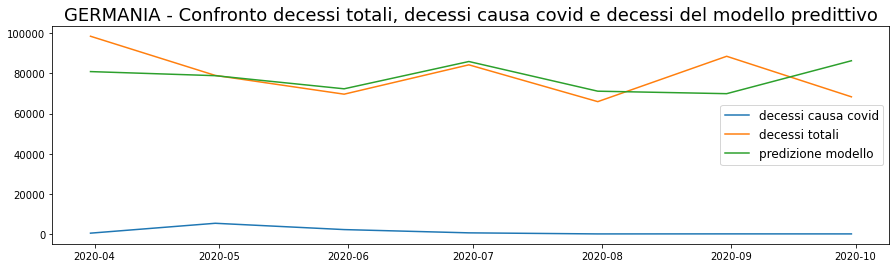

In [90]:
plt.figure(figsize=(15,4))
plt.title('GERMANIA - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_tot, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

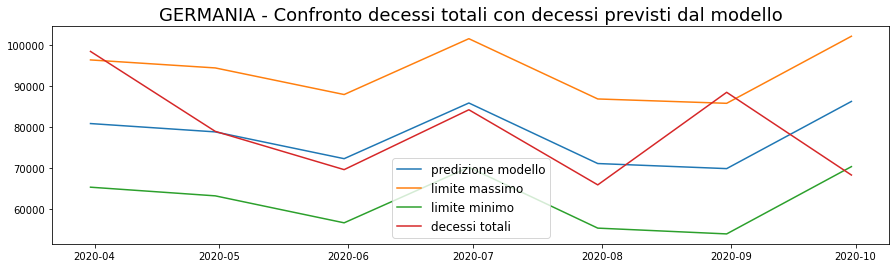

In [91]:
plt.figure(figsize=(15,4))
plt.title("GERMANIA - Confronto decessi totali con decessi previsti dal modello", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.plot(decessi_tot, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali e i decessi secondo la previsione del modello SARIMA.

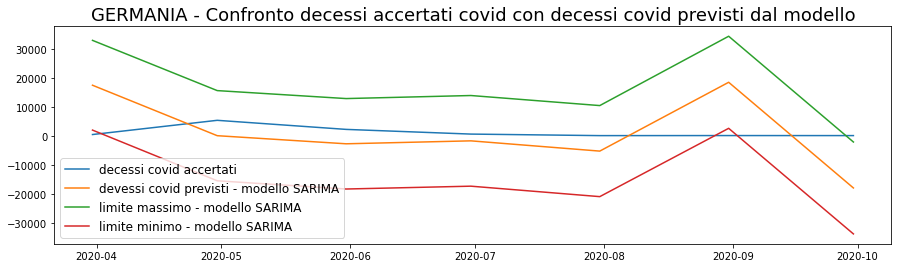

In [92]:
n = decessi_tot - predictions
n_upper = decessi_tot - lower
n_lower = decessi_tot - upper

plt.figure(figsize=(15,4))
plt.title("GERMANIA - Confronto decessi accertati covid con decessi covid previsti dal modello", size=18)
plt.plot(covid, label='decessi covid accertati')
plt.plot(n, label='devessi covid previsti - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend(prop={'size': 12})
plt.show()

Gli <b>intervalli</b> corrispondono alla differenza tra i decessi totali per i mesi di marzo, aprile, maggio, giugno, luglio e settembre 2020 e i valori degli <b>intervalli di confidenza</b> (intervallo superiore e intervallo inferiore) del modello predittivo SARIMA dei medesimi mesi.

<h3>Numero totale dei decessi accertati COVID-19 registrati in Germania</h3>

In [93]:
m = covid.sum()
print(int(m))

9464


<h3>Numero totale dei decessi COVID-19 previsti dal modello per la Germania</h3>

<h4>Valore medio

In [94]:
total = n.sum()
print(int(total))

8840


<h4>Valore massimo

In [95]:
total_upper = n_upper.sum()
print(int(total_upper))

118725


<h4>Valore minimo

In [96]:
total_lower = n_lower.sum()
print(int(total_lower))

-101044


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA in Germania</h3>

<h4>Valore medio

In [97]:
x = decessi_tot - predictions - covid
x = x.sum()
print(int(x))

-623


<h4>Valore massimo

In [98]:
x_upper = decessi_tot - lower - covid
x_upper = x_upper.sum()
print(int(x_upper))

109261


<h4>Valore minimo

In [99]:
x_lower = decessi_tot - upper - covid
x_lower = x_lower.sum()
print(int(x_lower))

-110508
